**Exploratory Data Analysis**

**1) Data Collection:**

Dataset taken from kaggle about planes manufactured. Data set consists of numerical, string and decimal values.

**2) Data Description:**

Cars Data has Information about 3 brands/make of cars. Namely US, Japan, Europe. Target of the data set to find the brand of a car using the parameters such as horsepower, Cubic inches, Make year, etc.

A decision tree can be used create a predictive data model to predict the car brand.


**3) Data Relation: Independent and Dependent analysis of features and samples**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cars.csv to cars.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

# Load data
dat = pd.read_csv("cars.csv")
print(dat.shape)
dat.head(100)

(261, 8)


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
95,17.0,6,231,110,3907,21,1976,US.
96,12.0,8,350,180,4499,13,1974,US.
97,18.0,6,250,88,3139,15,1972,US.
98,18.2,8,318,135,3830,15,1980,US.


Data types of each attribute in the data set

In [4]:
dat.dtypes

mpg             float64
 cylinders        int64
 cubicinches     object
 hp               int64
 weightlbs       object
 time-to-60       int64
 year             int64
 brand           object
dtype: object

%matplotlib inline -> sets the backend of matplotlib to the inline backend


In [5]:
dat.describe(include='all')


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
count,261.000000,261.000000,261,261.000000,261,261.000000,261.000000,261
unique,NaN,NaN,75,NaN,240,NaN,NaN,3
top,NaN,NaN,97,NaN,2130,NaN,NaN,US.
freq,NaN,NaN,16,NaN,3,NaN,NaN,162
mean,23.144828,5.590038,NaN,106.360153,NaN,15.547893,1976.819923,NaN
std,7.823570,1.733310,NaN,40.499959,NaN,2.910625,3.637696,NaN
min,10.000000,3.000000,NaN,46.000000,NaN,8.000000,1971.000000,NaN
25%,16.900000,4.000000,NaN,75.000000,NaN,14.000000,1974.000000,NaN
50%,22.000000,6.000000,NaN,95.000000,NaN,16.000000,1977.000000,NaN
75%,28.800000,8.000000,NaN,138.000000,NaN,17.000000,1980.000000,NaN


[print(dat.shape)] This gives the size of the data set

Splitting the dataset into independent values in a matrix form

In [6]:
X = dat.iloc[:, :-1].values
print(X)

[[14.0 8 '350' ... '4209' 12 1972]
 [31.9 4 '89' ... '1925' 14 1980]
 [17.0 8 '302' ... '3449' 11 1971]
 ...
 [22.0 6 '232' ... '2835' 15 1983]
 [18.0 6 '232' ... '3288' 16 1972]
 [22.0 6 '250' ... '3353' 15 1977]]


Getting the dependent values

In [7]:
Y = dat.iloc[:,-1].values
print(Y)

[' US.' ' Europe.' ' US.' ' US.' ' US.' ' US.' ' US.' ' US.' ' Europe.'
 ' Japan.' ' Japan.' ' Europe.' ' US.' ' US.' ' US.' ' US.' ' Japan.'
 ' US.' ' Japan.' ' Europe.' ' Japan.' ' Europe.' ' US.' ' US.' ' Japan.'
 ' Japan.' ' Japan.' ' US.' ' US.' ' US.' ' Japan.' ' US.' ' Japan.'
 ' US.' ' Japan.' ' US.' ' Europe.' ' Japan.' ' US.' ' US.' ' US.' ' US.'
 ' US.' ' US.' ' US.' ' Japan.' ' US.' ' US.' ' Europe.' ' US.' ' US.'
 ' Europe.' ' US.' ' Europe.' ' US.' ' US.' ' Japan.' ' US.' ' Europe.'
 ' US.' ' US.' ' Japan.' ' Japan.' ' Japan.' ' US.' ' US.' ' Europe.'
 ' Japan.' ' Europe.' ' US.' ' US.' ' US.' ' Japan.' ' Japan.' ' Europe.'
 ' US.' ' US.' ' Japan.' ' Europe.' ' Japan.' ' US.' ' US.' ' US.'
 ' Europe.' ' Europe.' ' Japan.' ' US.' ' US.' ' US.' ' US.' ' Japan.'
 ' Japan.' ' US.' ' US.' ' US.' ' US.' ' US.' ' US.' ' US.' ' US.' ' US.'
 ' US.' ' US.' ' US.' ' Japan.' ' US.' ' Europe.' ' Europe.' ' Europe.'
 ' US.' ' Japan.' ' Europe.' ' US.' ' Japan.' ' Europe.' ' US.' ' US.'

4)**Data Pre-processing**

i) Checking for missing values

In [8]:
dat.isna()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
256,False,False,False,False,False,False,False,False
257,False,False,False,False,False,False,False,False
258,False,False,False,False,False,False,False,False
259,False,False,False,False,False,False,False,False


In [9]:
#Count for missing values
dat.isna().sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
 brand          0
dtype: int64

ii) Outlier point check

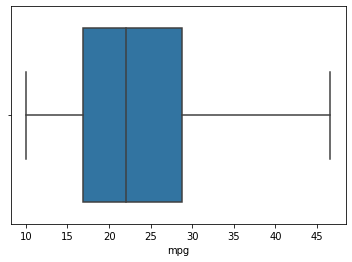

In [11]:
sns.boxplot(x=dat['mpg'])

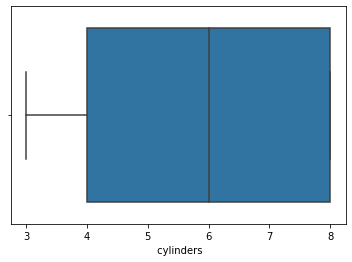

In [19]:
sns.boxplot(x=dat[' cylinders'])

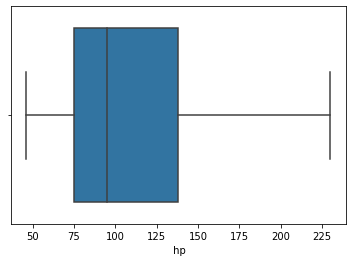

In [20]:
sns.boxplot(x=dat[' hp'])

iii) Transforming the data set

In [21]:
#Performing binning on the data
data = dat['mpg']
data = data[:30] #taking only first 30 data items
data=np.sort(data)
print('Data:')
print(data)
print('')

#create three different matrices having 10 rows and 3 columns
b1=np.zeros((10,3)) 
b2=np.zeros((10,3)) 
b3=np.zeros((10,3)) 

#binning by mean
for i in range (0,30,3): 
  k=int(i/3) 
  mean=(data[i] + data[i+1] + data[i+2] )/3
  for j in range(3): 
    b1[k,j]=mean 
print("----Binning by mean:---- \n",b1)
print('')

#binning by median
for i in range (0,30,3): 
  k=int(i/3) 
  for j in range (3): 
    b2[k,j]=data[i+1] 
print("----Binning by median:---- \n",b2)
print('')

#binning by boundary
for i in range (0,30,3): 
  k=int(i/3) 
  for j in range (3): 
    if (data[i+j]-data[i]) < (data[i+2]-data[i+j]): 
      b3[k,j]=data[i] 
    else: 
      b3[k,j]=data[i+2]   
print("----Binning by boundary:----\n",b3)

Data:
[11.  13.  14.  14.  14.  15.  15.5 16.  16.  16.9 17.  18.  19.1 21.5
 23.  24.  24.  24.  25.4 29.9 30.5 31.  31.8 31.9 33.  34.  34.3 37.2
 37.7 38.1]

----Binning by mean:---- 
 [[12.66666667 12.66666667 12.66666667]
 [14.33333333 14.33333333 14.33333333]
 [15.83333333 15.83333333 15.83333333]
 [17.3        17.3        17.3       ]
 [21.2        21.2        21.2       ]
 [24.         24.         24.        ]
 [28.6        28.6        28.6       ]
 [31.56666667 31.56666667 31.56666667]
 [33.76666667 33.76666667 33.76666667]
 [37.66666667 37.66666667 37.66666667]]

----Binning by median:---- 
 [[13.  13.  13. ]
 [14.  14.  14. ]
 [16.  16.  16. ]
 [17.  17.  17. ]
 [21.5 21.5 21.5]
 [24.  24.  24. ]
 [29.9 29.9 29.9]
 [31.8 31.8 31.8]
 [34.  34.  34. ]
 [37.7 37.7 37.7]]

----Binning by boundary:----
 [[11.  14.  14. ]
 [14.  14.  15. ]
 [15.5 16.  16. ]
 [16.9 16.9 18. ]
 [19.1 23.  23. ]
 [24.  24.  24. ]
 [25.4 30.5 30.5]
 [31.  31.9 31.9]
 [33.  34.3 34.3]
 [37.2 38.1 38.1]

Min-Max normalization:

In [23]:
import statistics
from sklearn import preprocessing

#min-max normalization
def minMaxNor(num,list):
    minNum=int(input("Enter Minimun Setting:\t"))
    maxNum = int(input("Enter Maximum Setting:\t"))
    ans=round(((num-min(list))/(max(list)-min(list))*(maxNum-minNum))+minNum,2)
    return ans
dat = pd.read_csv("cars.csv")
data = dat['mpg']
data = data[:10] #taking only first 10 data items
data=np.sort(data)
print(data)

#z-score normalization
def zNor (num,mean,stdDv):
    return round((num-mean)/stdDv,2)

#modified z-score normalization
def zNorMAD (num,mean,abMeanDiv):
    return round((num-mean)/abMeanDiv,2)

#decimal-scaling normalization
def decNor(num,maxNum):
    digit=len(str(maxNum))
    div=pow(10,digit)
    return num/div

num=int(input("Enter an item from data : \t"))
if num in data:
  print("Calculating  min-max normalization")
  print("After doing min-max normalization :",minMaxNor(num,data))
  print("\nCalculating z-score normalization")
  print("After doing z-score normalization : \t", zNor(num,statistics.mean(data),statistics.stdev(data)))
  print("\nCalculating Modified z-score normalization")
  dat = pd.DataFrame(data)
  print("After doing Modified z-score normalization : \t", zNorMAD(num,statistics.mean(data),dat.mad()))
  print("\nCalculating decimal scaling normalization")
  print("After doing decimal scaling normalization : \t", decNor(num,max(data)))
else:
  print("Item entered is not present!!")
  print("Can't perform normalization on the selected item!")

[13.  14.  14.  15.  17.  23.  25.4 30.5 31.9 37.7]
Enter an item from data : 	15
Calculating  min-max normalization
Enter Minimun Setting:	0
Enter Maximum Setting:	1
After doing min-max normalization : 0.08

Calculating z-score normalization
After doing z-score normalization : 	 -0.8

Calculating Modified z-score normalization
After doing Modified z-score normalization : 	 0   -0.95
dtype: float64

Calculating decimal scaling normalization
After doing decimal scaling normalization : 	 0.0015


5) Performing data visualization

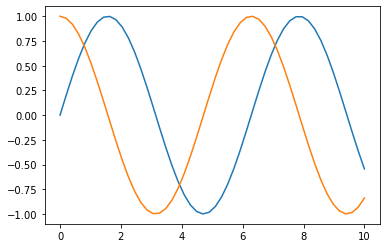

In [24]:
x = np.linspace(0,10,50)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

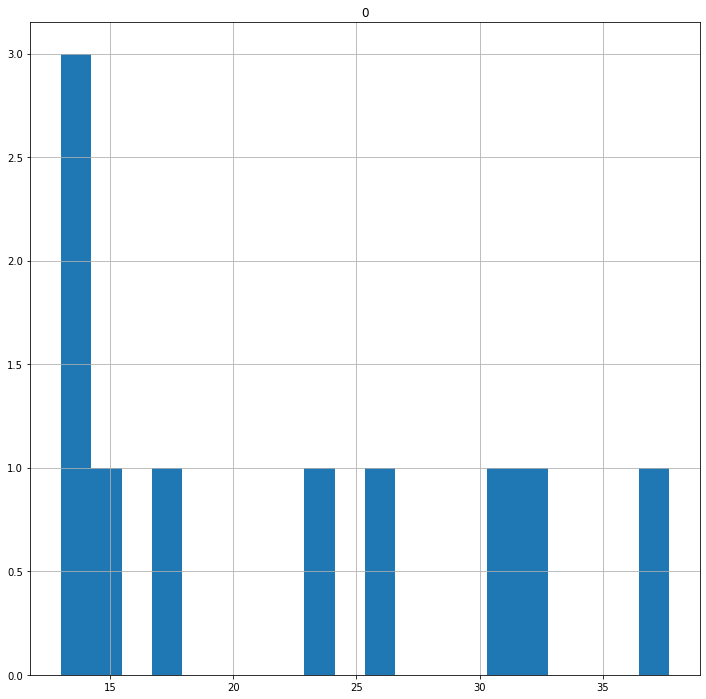

In [25]:
dat.hist(figsize=(12,12), bins=20)
plt.show()